In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
def load_cpi_data(filepath, sector_name):
    df = pd.read_csv(filepath)
    
    df['Month'] = df['Month'].str.strip()
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
    df.set_index('Date', inplace=True)
    df = df.sort_index()
    df.drop(columns=['Year', 'Month', 'Sector','Housing'], inplace=True)
    df.fillna(df.mean(numeric_only=True), inplace=True)
    return df


In [9]:
rural_cpi = load_cpi_data("rural_data.csv", "Rural")
rural_cpi.head()

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",Food and beverages,"Pan, tobacco and intoxicants",Clothing,Footwear,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Sector_Category
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,106.8,103.1,104.8,106.7,105.5,105.1,106.5,105.8,106.4,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,Rural
2013-02-01,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,105.7,103.1,105.1,107.7,106.3,105.6,107.1,106.3,107.0,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,Rural
2013-03-01,110.2,108.8,109.9,105.6,106.2,105.7,101.4,105.7,105.0,103.3,105.6,108.2,106.6,106.5,107.6,106.8,107.5,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0,Rural
2013-04-01,110.2,109.5,106.9,106.3,105.7,108.3,103.4,105.7,104.2,103.2,106.5,108.8,107.1,107.1,108.1,107.4,108.0,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4,Rural
2013-05-01,110.9,109.8,105.9,107.5,105.3,108.1,107.3,106.1,103.7,104.0,107.4,109.9,108.1,108.1,108.8,107.9,108.6,107.5,106.8,105.7,104.1,105.0,105.5,102.1,104.8,107.2,Rural


In [4]:
rural_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2013-01-01 to 2024-02-01
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cereals and products                 133 non-null    float64
 1   Meat and fish                        133 non-null    float64
 2   Egg                                  133 non-null    float64
 3   Milk and products                    133 non-null    float64
 4   Oils and fats                        133 non-null    float64
 5   Fruits                               133 non-null    float64
 6   Vegetables                           133 non-null    float64
 7   Pulses and products                  133 non-null    float64
 8   Sugar and Confectionery              133 non-null    float64
 9   Spices                               133 non-null    float64
 10  Non-alcoholic beverages              133 non-null    float64
 11  Prepared meal

In [5]:
urban_cpi = load_cpi_data("Urban_data.csv", "Urban")
urban_cpi.head()

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",Food and beverages,"Pan, tobacco and intoxicants",Clothing,Footwear,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Sector_Category
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.8,105.1,101.8,105.1,107.9,105.9,105.2,105.9,105.0,105.8,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,Urban
2013-02-01,112.9,112.9,116.9,104.0,103.5,103.1,104.9,104.1,103.8,102.3,106.0,109.0,107.2,106.0,106.6,105.5,106.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7,Urban
2013-03-01,113.9,111.4,113.2,104.3,102.7,104.9,103.8,103.5,102.6,102.4,107.0,109.8,107.3,106.8,107.2,106.0,107.0,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0,Urban
2013-04-01,114.6,113.4,106.0,104.7,102.1,109.5,109.7,104.6,102.0,103.5,108.2,110.6,108.8,108.5,107.9,106.4,107.7,106.4,106.5,105.7,105.0,104.0,105.2,103.2,105.1,105.7,Urban
2013-05-01,115.4,114.2,102.7,105.5,101.5,110.6,123.7,105.2,101.9,105.0,109.1,111.3,111.1,109.8,108.5,106.7,108.3,107.2,107.1,106.2,103.9,104.6,105.7,102.6,104.9,106.6,Urban


In [13]:
urban_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2013-01-01 to 2024-02-01
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cereals and products                 133 non-null    float64
 1   Meat and fish                        133 non-null    float64
 2   Egg                                  133 non-null    float64
 3   Milk and products                    133 non-null    float64
 4   Oils and fats                        133 non-null    float64
 5   Fruits                               133 non-null    float64
 6   Vegetables                           133 non-null    float64
 7   Pulses and products                  133 non-null    float64
 8   Sugar and Confectionery              133 non-null    float64
 9   Spices                               133 non-null    float64
 10  Non-alcoholic beverages              133 non-null    float64
 11  Prepared meal

In [16]:
combined_cpi = load_cpi_data("dual_data.csv", "Urban+Rural")
combined_cpi.head()

ValueError: time data "2014-Marcrh" doesn't match format "%Y-%B", at position 14. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
combined_cpi.info()

NameError: name 'combined_cpi' is not defined

In [ ]:
def nifty_data(filepath):
    df = pd.read_excel(filepath)
    df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y-%d-%m', errors='coerce')
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False).astype(float)

    df.set_index('Date', inplace=True)
    df = df.rename(columns={"Price": "Nifty_Consumption_Index"})
    df.sort_index(inplace=True)

    return df


In [ ]:
nifty = nifty_data("nifty_consumption.xlsx")
nifty.head()

,Nifty_Consumption_Index
Date,
2013-01-01,2319.45
2013-02-01,2194.65
2013-03-01,2188.20
2013-04-01,2396.40
2013-05-01,2457.85


In [ ]:
combined_df = pd.DataFrame(index=nifty.index)
combined_df['Rural_CPI'] = rural_cpi['General index'].reindex(nifty.index)
combined_df['Urban_CPI'] = urban_cpi['General index'].reindex(nifty.index)

combined_df['Nifty_Index'] = nifty['Nifty_Consumption_Index']

combined_df.dropna(inplace=True)
combined_df.head()


,Rural_CPI,Urban_CPI,Nifty_Index
Date,,,
2013-01-01,105.1,104.0,2319.45
2013-02-01,105.8,104.7,2194.65
2013-03-01,106.0,105.0,2188.20
2013-04-01,106.4,105.7,2396.40
2013-05-01,107.2,106.6,2457.85


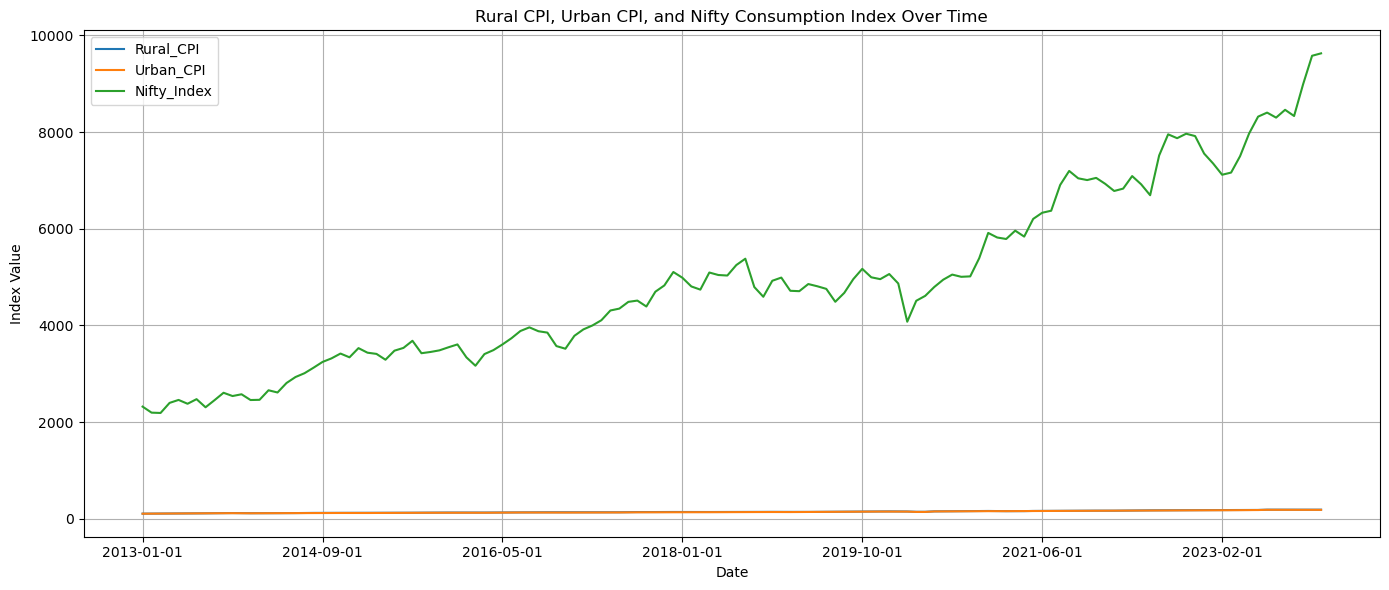

In [ ]:
combined_df.plot(title='Rural CPI, Urban CPI, and Nifty Consumption Index Over Time', figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.tight_layout()
plt.show()

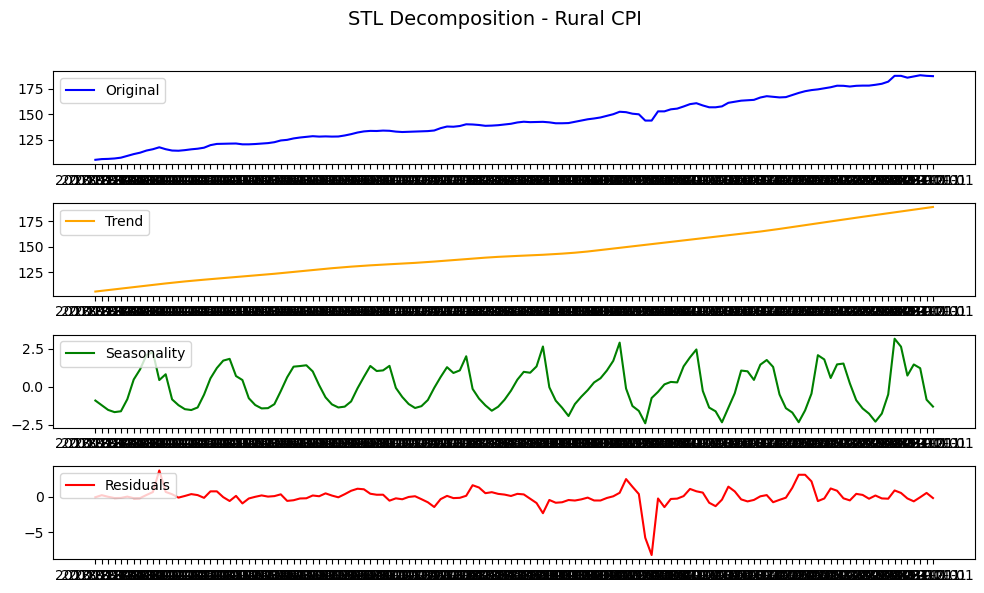

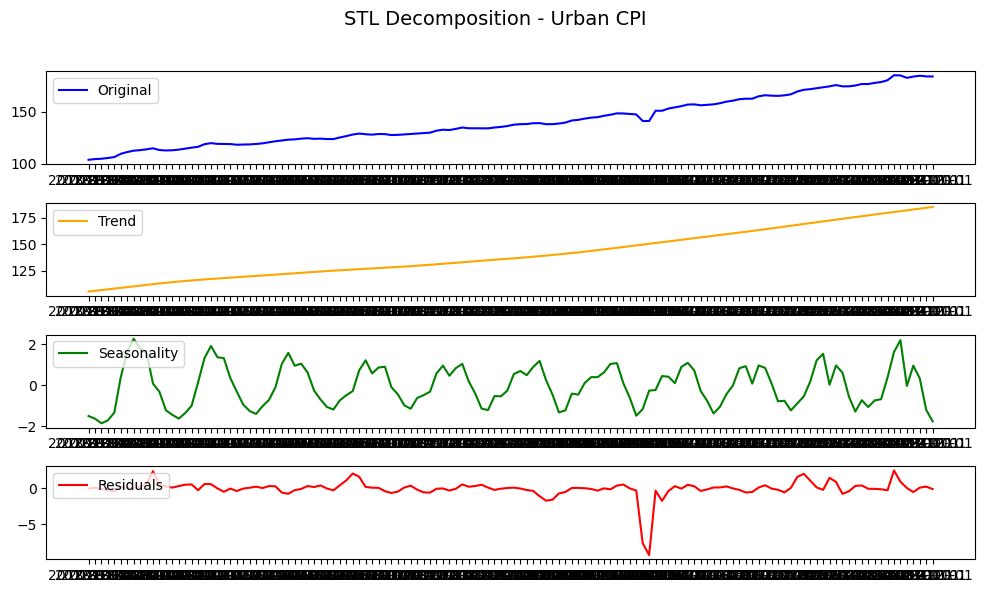

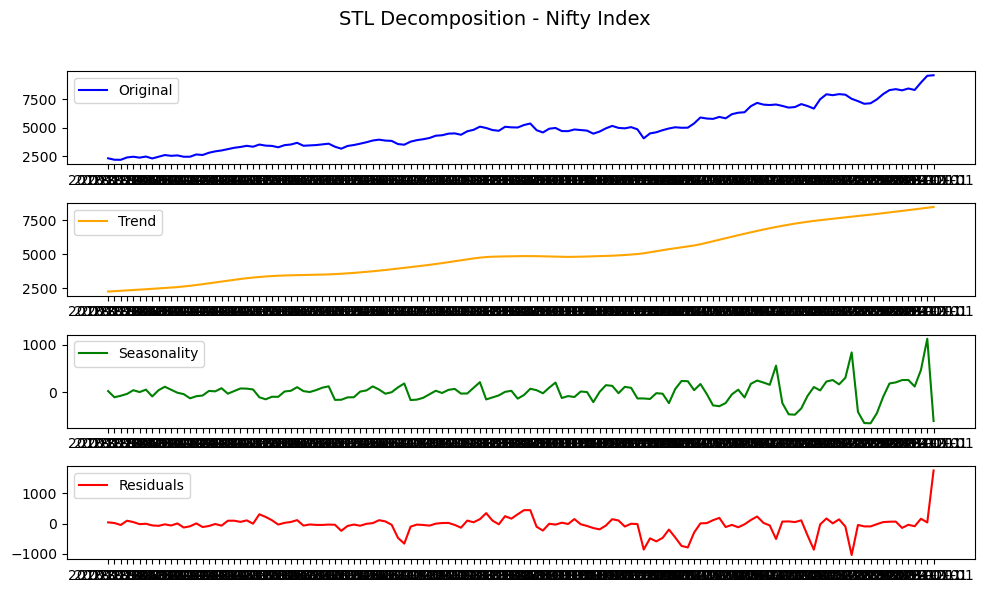

In [ ]:
from statsmodels.tsa.seasonal import STL
seasonal_period = 12

def plot_stl(series, title, period=seasonal_period):
    stl = STL(series, period=period, robust=True)
    result = stl.fit()

    plt.figure(figsize=(10, 6))
    plt.suptitle(f'STL Decomposition - {title}', fontsize=14)

    plt.subplot(4, 1, 1)
    plt.plot(series, label='Original', color='blue')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', color='orange')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonality', color='green')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residuals', color='red')
    plt.legend(loc='upper left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_stl(combined_df['Rural_CPI'], 'Rural CPI')
plot_stl(combined_df['Urban_CPI'], 'Urban CPI')
plot_stl(combined_df['Nifty_Index'], 'Nifty Index')


In [ ]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"\nADF Test for {name}:")
    print(f"  Test Statistic : {result[0]:.4f}")
    print(f"  p-value        : {result[1]:.4f}")
    print("  Stationary     :", "Yes" if result[1] < 0.05 else "No")


In [ ]:
adf_results = {}
for col in combined_df.columns:
    adf_test(combined_df[col], col)


ADF Test for Rural_CPI:
  Test Statistic : 2.1615
  p-value        : 0.9988
  Stationary     : No

ADF Test for Urban_CPI:
  Test Statistic : 2.5862
  p-value        : 0.9991
  Stationary     : No

ADF Test for Nifty_Index:
  Test Statistic : 1.1207
  p-value        : 0.9954
  Stationary     : No


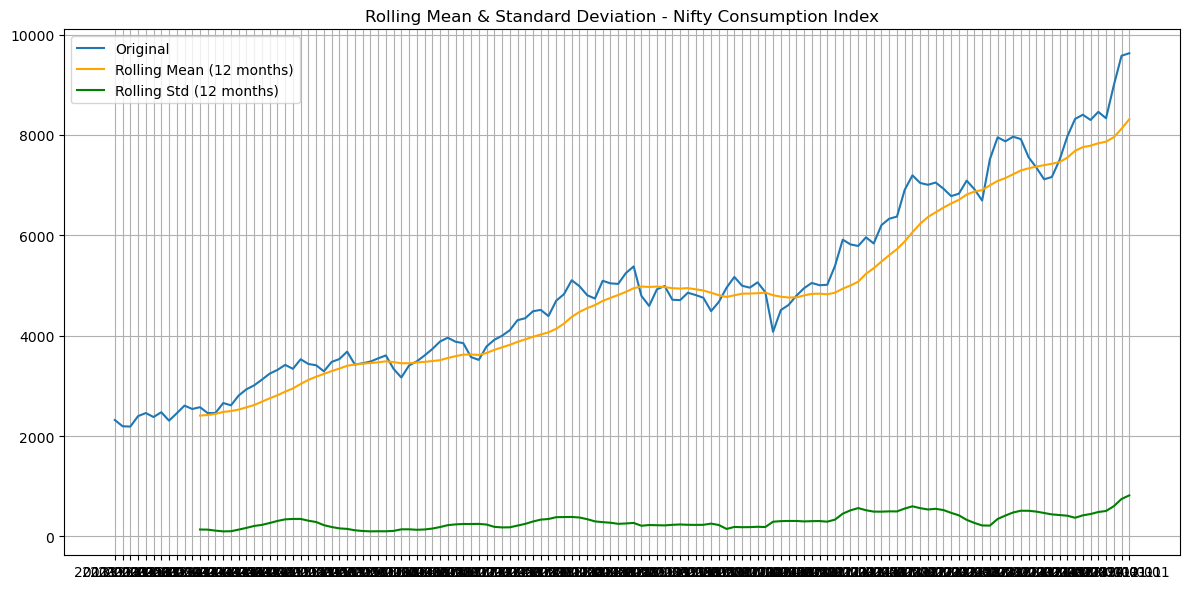

In [ ]:
roll_window = 12
rolling_mean = combined_df['Nifty_Index'].rolling(window=roll_window).mean()
rolling_std = combined_df['Nifty_Index'].rolling(window=roll_window).std()

plt.figure(figsize=(12, 6))
plt.plot(combined_df['Nifty_Index'], label='Original')
plt.plot(rolling_mean, label=f'Rolling Mean ({roll_window} months)', color='orange')
plt.plot(rolling_std, label=f'Rolling Std ({roll_window} months)', color='green')
plt.title('Rolling Mean & Standard Deviation - Nifty Consumption Index')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

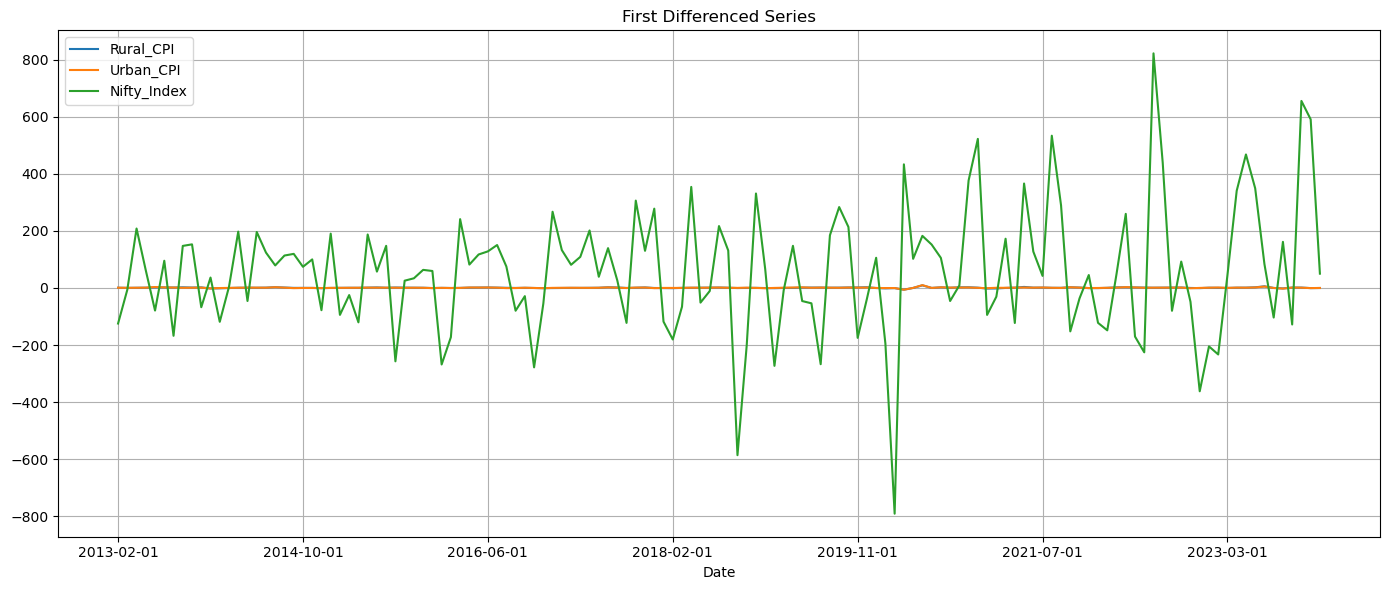

In [ ]:
diff_df = combined_df.diff().dropna()

diff_df.plot(figsize=(14, 6), title='First Differenced Series')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for col in diff_df.columns:
    adf_test(diff_df[col], f'{col} (Differenced)')


ADF Test for Rural_CPI (Differenced):
  Test Statistic : -7.2564
  p-value        : 0.0000
  Stationary     : Yes

ADF Test for Urban_CPI (Differenced):
  Test Statistic : -6.8683
  p-value        : 0.0000
  Stationary     : Yes

ADF Test for Nifty_Index (Differenced):
  Test Statistic : -9.4148
  p-value        : 0.0000
  Stationary     : Yes


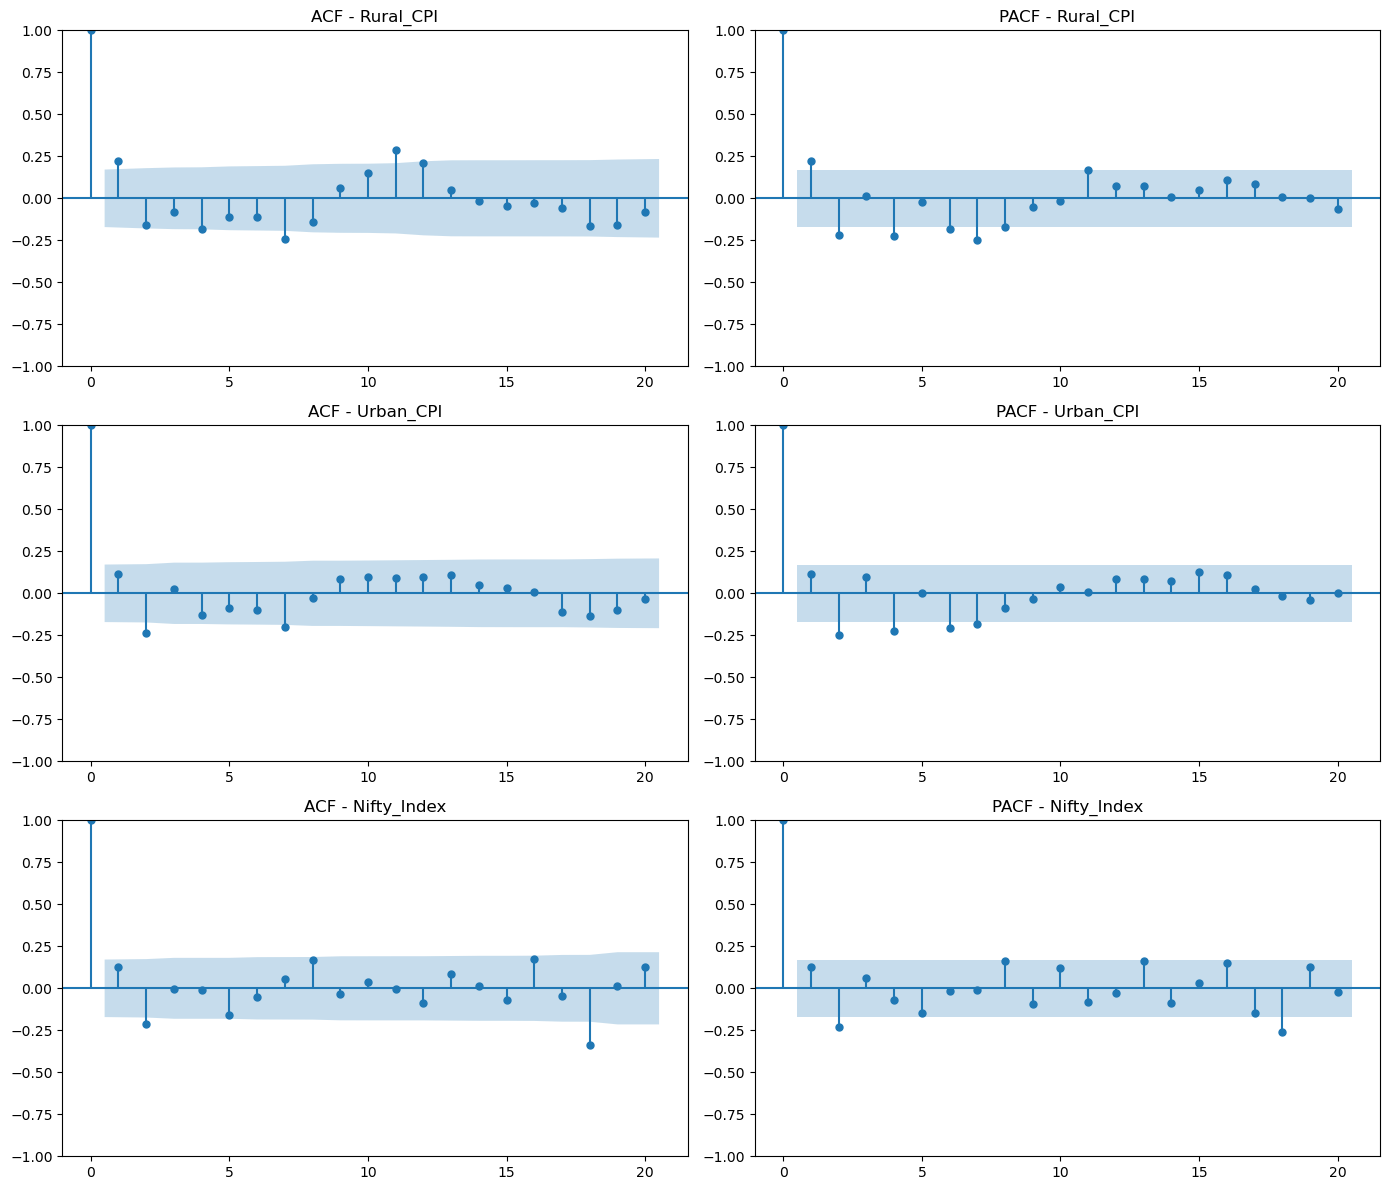

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, col in enumerate(diff_df.columns):
    plot_acf(diff_df[col], lags=20, ax=axes[i, 0])
    plot_pacf(diff_df[col], lags=20, ax=axes[i, 1])
    axes[i, 0].set_title(f'ACF - {col}')
    axes[i, 1].set_title(f'PACF - {col}')

plt.tight_layout()
plt.show()


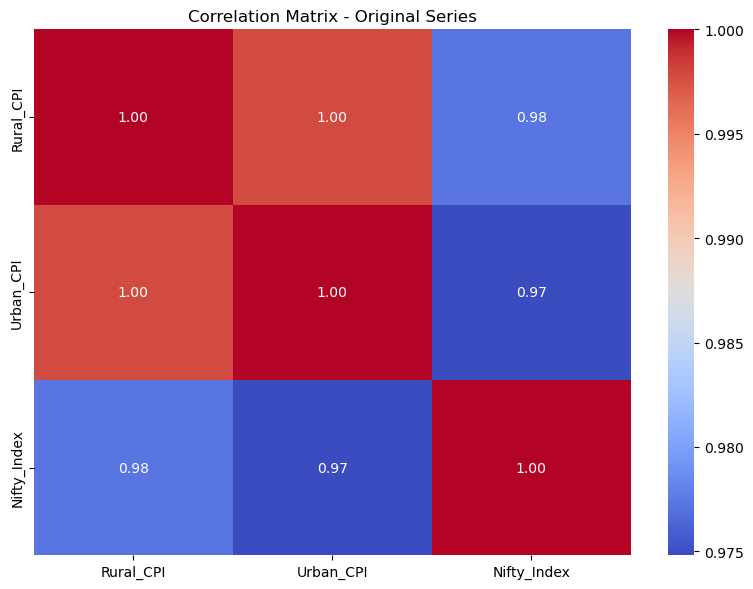

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Original Series')
plt.tight_layout()
plt.show()

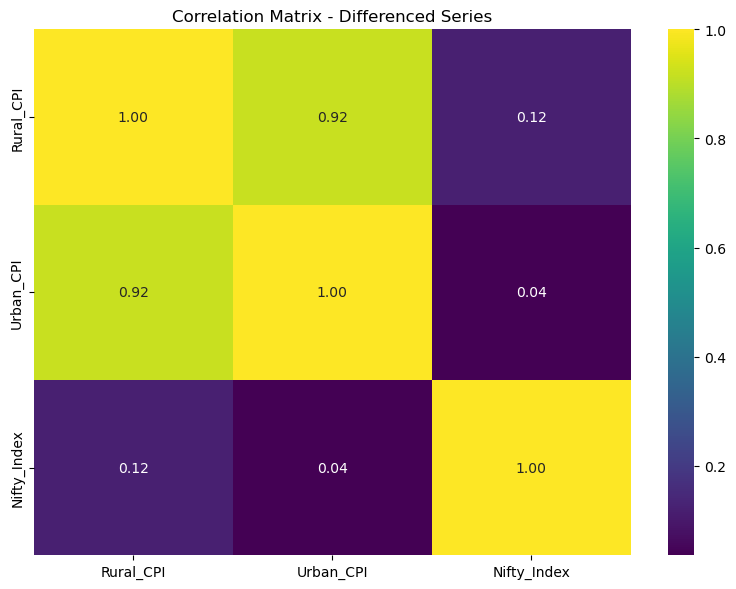

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(diff_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix - Differenced Series')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR

In [ ]:
import warnings
max_lag = 1
granger_results = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    for caused in diff_df.columns:
        for causing in diff_df.columns:
            if caused != causing:
                test_result = grangercausalitytests(diff_df[[caused, causing]], maxlag=max_lag, verbose=False)
                p_value = test_result[1][0]['ssr_ftest'][1]
                granger_results[(causing, caused)] = p_value

In [ ]:
granger_results

{('Urban_CPI', 'Rural_CPI'): 0.8815087153240123,
 ('Nifty_Index', 'Rural_CPI'): 0.022032965779686445,
 ('Rural_CPI', 'Urban_CPI'): 0.8846620050841582,
 ('Nifty_Index', 'Urban_CPI'): 0.019510633181156832,
 ('Rural_CPI', 'Nifty_Index'): 0.13981585354762227,
 ('Urban_CPI', 'Nifty_Index'): 0.16460494638100043}

C:\Users\HP\AppData\Local\Temp\ipykernel_9424\1399136334.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


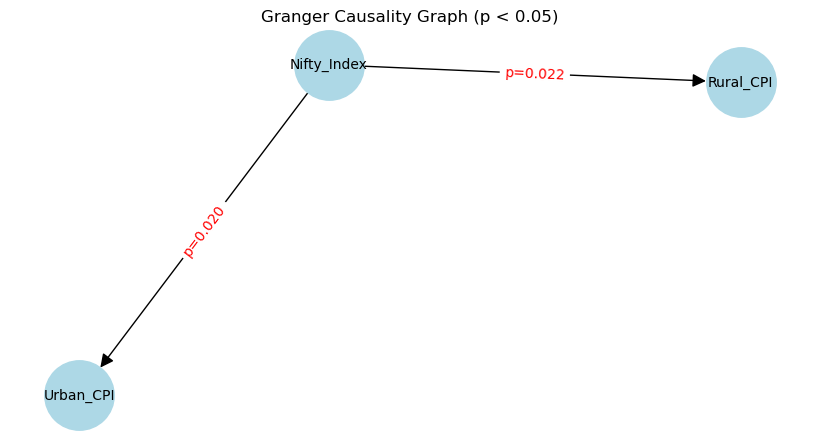

In [ ]:
import networkx as nx
causal_pairs = {k: v for k, v in granger_results.items() if v < 0.05}
G = nx.DiGraph()

for (cause, effect), p_value in causal_pairs.items():
    G.add_edge(cause, effect, weight=round(p_value, 4), label=f"p={p_value:.3f}")

plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", arrows=True, arrowstyle='-|>', arrowsize=20, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Granger Causality Graph (p < 0.05)")
plt.tight_layout()
plt.show()

In [ ]:
model = VAR(diff_df)
lag_order_results = model.select_order(maxlags=12)
print("Lag Order Selection:\n", lag_order_results.summary())

selected_lag = lag_order_results.selected_orders['aic'] 
var_model = model.fit(selected_lag)

print("\nVAR Model Summary:\n", var_model.summary())

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order Selection:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        10.27      10.34*   2.881e+04      10.30*
1        10.23       10.51   2.772e+04       10.34
2        10.11       10.60   2.465e+04       10.31
3        10.15       10.85   2.563e+04       10.43
4        10.07       10.98   2.373e+04       10.44
5        10.04       11.16   2.305e+04       10.50
6        10.08       11.41   2.401e+04       10.62
7        10.08       11.62   2.415e+04       10.71
8        10.01       11.76  2.266e+04*       10.72
9        10.08       12.04   2.458e+04       10.88
10       10.15       12.32   2.649e+04       11.03
11       10.00       12.39   2.321e+04       10.97
12      10.00*       12.60   2.355e+04       11.06
--------------------------------------------------

VAR Model Summary:
   Summary of Regression Results   
Model:                         VAR
Method:             

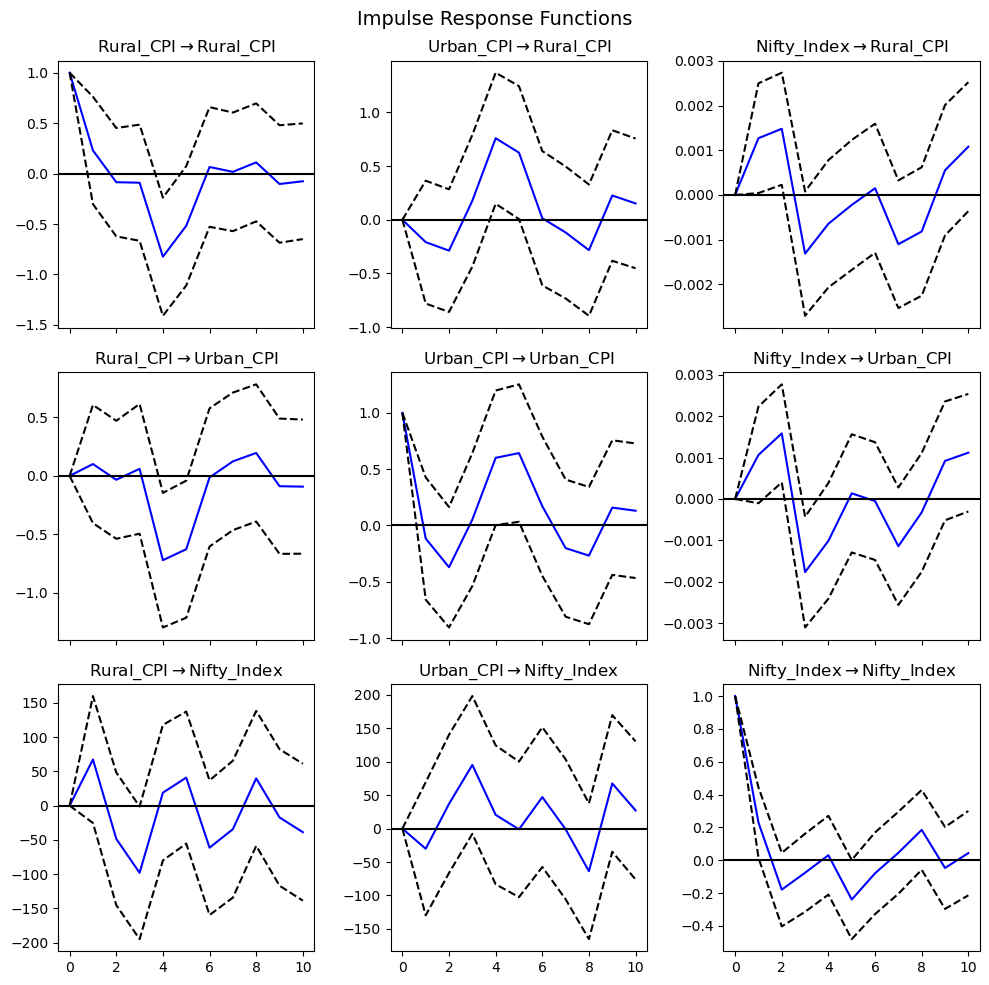

In [ ]:
irf = var_model.irf(10)  
irf.plot(orth=False)
plt.suptitle("Impulse Response Functions", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
rural_cpi.index = pd.to_datetime(rural_cpi.index)
nifty.index = pd.to_datetime(nifty.index)

selected_cols = rural_cpi.columns.tolist()
selected_cols.append('General index')

combined = pd.concat([rural_cpi[selected_cols], nifty['Nifty_Consumption_Index'].rename('Nifty_Index')],axis=1, join='inner')

combined.dropna(inplace=True)

print("Combined dataset shape:", combined.shape)
combined.head()


Combined dataset shape: (132, 28)


,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",Food and beverages,"Pan, tobacco and intoxicants",Clothing,Footwear,Clothing and footwear,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,General index,Nifty_Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,107.5,106.3,108.1,104.9,106.1,103.9,101.9,106.1,106.8,103.1,104.8,106.7,105.5,105.1,106.5,105.8,106.4,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,105.1,2319.45
2013-02-01,109.2,108.7,110.2,105.4,106.7,104.0,102.4,105.9,105.7,103.1,105.1,107.7,106.3,105.6,107.1,106.3,107.0,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,105.8,2194.65
2013-03-01,110.2,108.8,109.9,105.6,106.2,105.7,101.4,105.7,105.0,103.3,105.6,108.2,106.6,106.5,107.6,106.8,107.5,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0,106.0,2188.20
2013-04-01,110.2,109.5,106.9,106.3,105.7,108.3,103.4,105.7,104.2,103.2,106.5,108.8,107.1,107.1,108.1,107.4,108.0,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4,106.4,2396.40
2013-05-01,110.9,109.8,105.9,107.5,105.3,108.1,107.3,106.1,103.7,104.0,107.4,109.9,108.1,108.1,108.8,107.9,108.6,107.5,106.8,105.7,104.1,105.0,105.5,102.1,104.8,107.2,107.2,2457.85


In [ ]:
def decompose_and_plot(series, title):
    result = seasonal_decompose(series, model='additive', period=12)
    fig = result.plot()
    fig.suptitle(f"Decomposition of {title}", fontsize=14)
    for ax in fig.axes:
        ax.tick_params(axis='x', labelrotation=45)
    plt.tight_layout()
    plt.show()



In [ ]:

def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test - {title}: p-value={result[1]:.4f}, Stationary: {"Yes" if result[1] < 0.05 else "No"}')

for col in combined.columns:
    adf_test(combined[col], col)

ADF Test - Cereals and products: p-value=0.9991, Stationary: No
ADF Test - Meat and fish: p-value=0.9016, Stationary: No
ADF Test - Egg: p-value=0.9908, Stationary: No
ADF Test - Milk and products: p-value=0.9633, Stationary: No
ADF Test - Oils and fats: p-value=0.7288, Stationary: No
ADF Test - Fruits: p-value=0.7444, Stationary: No
ADF Test - Vegetables: p-value=0.7321, Stationary: No
ADF Test - Pulses and products: p-value=0.7289, Stationary: No
ADF Test - Sugar and Confectionery: p-value=0.8034, Stationary: No
ADF Test - Spices: p-value=0.9984, Stationary: No
ADF Test - Non-alcoholic beverages: p-value=0.9615, Stationary: No
ADF Test - Prepared meals, snacks, sweets etc.: p-value=0.9110, Stationary: No
ADF Test - Food and beverages: p-value=0.9975, Stationary: No
ADF Test - Pan, tobacco and intoxicants: p-value=0.8144, Stationary: No
ADF Test - Clothing: p-value=0.9570, Stationary: No
ADF Test - Footwear: p-value=0.9511, Stationary: No
ADF Test - Clothing and footwear: p-value=0.95

ValueError: x is required to have ndim 1 but has ndim 2